#                          Deep Learning (CNN Model) for Handwritten  Digits Prediction (mnist dataset)

## Loading the  packages

In [2]:
import tensorflow as tf
import cv2
import glob
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split



# Loading data
 The mnist dataset is available in the keras dataset library.

In [3]:
mnist = tf.keras.datasets.mnist

# Spliting the data into train, validation,test datasets

 Getting the size of train,validation, test. The mnist dataset  for handwrittin digit is using the grayscale image represenyt by 1 and the size of th images are 28 x 28.

In [4]:
train,test=mnist.load_data()
data = train[0]
labels = train[1]
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

Img_size = 28
train_data = np.array(train_data).reshape(-1,Img_size,Img_size,1)
val_data= np.array(val_data).reshape(-1,Img_size,Img_size,1)

print("train labels : ",len(train_labels))
print("test labels",len(train_data))
print("val data",len(val_data))
print("val labels",len(val_labels))

print("test data :",len(test[0]))
print("test lables :",len(test[1]))

print("Dimension shape  of Training ", train_data.shape)
print("Dimension shape of validation",val_data.shape)


11490434/11490434 [==============================] - 1s 0us/step
train labels :  48000
test labels 48000
val data 12000
val labels 12000
test data : 10000
test lables : 10000
Dimension shape  of Training  (48000, 28, 28, 1)
Dimension shape of validation (12000, 28, 28, 1)


##  Setting the default values for CNN model

In [50]:
image_size = (28 ,28)
height = 28
width = 28
depth = 28
image_channel = 1
batch_size = 64


## CNN  Model

The CNN model with 2D convolution  is build by the keras sequential API. The CNN model consists of Convolution layers,maxpooling layers,Dense layer,Batch normalization layers, Drop out layer.

In [57]:
model = Sequential([
        # feature learning
        layers.Rescaling(1/255,input_shape = (height,width,image_channel)),

        layers.Conv2D(128,5,activation = "relu",padding = "same"),
        #layers.Conv2D(224,3,activation = "relu"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        #layers.Dropout(0.2),

        layers.Conv2D(64,3,activation = "relu"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        #layers.Dropout(0.2),

        layers.Conv2D(32,3,activation = "relu"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        #layers.Dropout(0.2),

       # layers.Conv2D(128,3,activation = "relu"),
        layers.Flatten(),
        layers.BatchNormalization(),

        # hidden layers or classification layers
        layers.Dense(112,activation = "relu",use_bias=True),
        layers.Dense(54,activation = "relu",use_bias=True),
        layers.Dense(24,activation = "relu",use_bias=True),

        # final layer
        layers.Dense(10,activation="softmax")])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_43 (Ba  (None, 14, 14, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)        

In [58]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [59]:
epocs = 50
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=epocs)

Epoch 1/50
1500/1500 [==============================] - 15s 7ms/step - loss: 0.1421 - accuracy: 0.9588 - val_loss: 0.0769 - val_accuracy: 0.9771
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.0530 - val_accuracy: 0.9855
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0452 - val_accuracy: 0.9893
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0327 - val_ac

In [60]:
# To save the model
from keras.models import load_model
model2.save("/content/drive/MyDrive/saved_models/Handwritten_digit.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Ploting the Loss and Accuracy graph

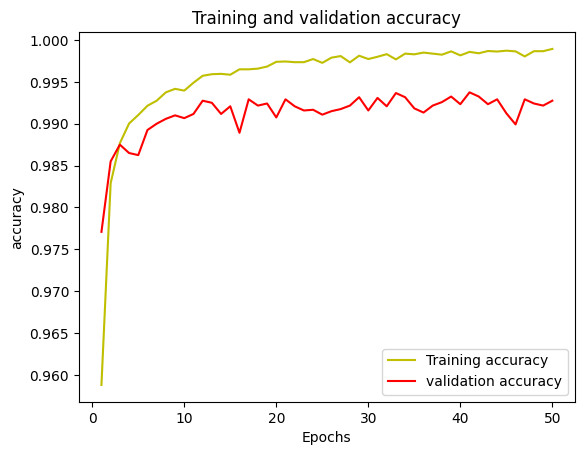

In [61]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'y',label='Training accuracy')
plt.plot(epochs,val_acc,"r",label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

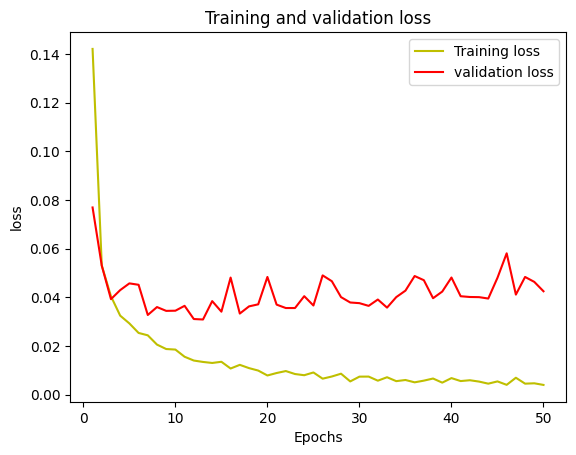

In [62]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,"r",label = "validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

##  Prediction of test data

In [63]:
test_data = test[0]
test_label = test[1]

# reshaping

test_data = np.array(test_data).reshape(-1,Img_size,Img_size,1)

In [64]:
prediction_probabilities = model.predict(test_data)

313/313 [==============================] - 1s 4ms/step


In [65]:
predicted_labels = []
for class_prob in prediction_probabilities:
  label = np.argmax(class_prob)
  predicted_labels.append(label)

In [72]:
len(predicted_labels)
len(test_label)

10000

In [67]:
print(predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [73]:
print(test_label)

[7 2 1 ... 4 5 6]


## Calculating  the accuracy

In [74]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.35%


## Confusion Matrix

<Axes: >

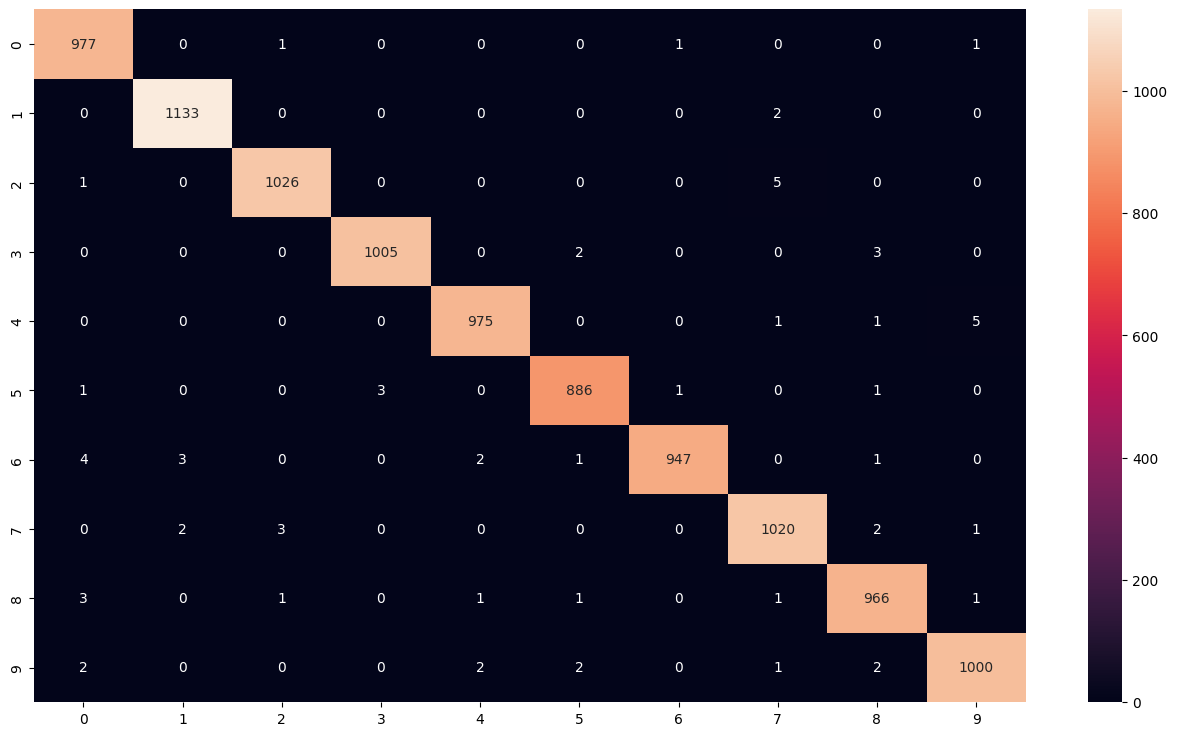

In [75]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
confusion_matrices = confusion_matrix(test_label, predicted_labels)
sns.heatmap(confusion_matrices,annot=True,fmt='d',xticklabels=class_names,yticklabels= class_names)

## Classification report

Classification report gives the information about the precession, recall,support values. Which hel

In [76]:
from sklearn.metrics import classification_report
cr = classification_report(test_label, predicted_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

